In [73]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma

In [52]:
errors = np.loadtxt("mc_error.txt")
Ns = [2 << i for i in range(5,20)]
dims = [2,4,6,8,12,14,16,20]

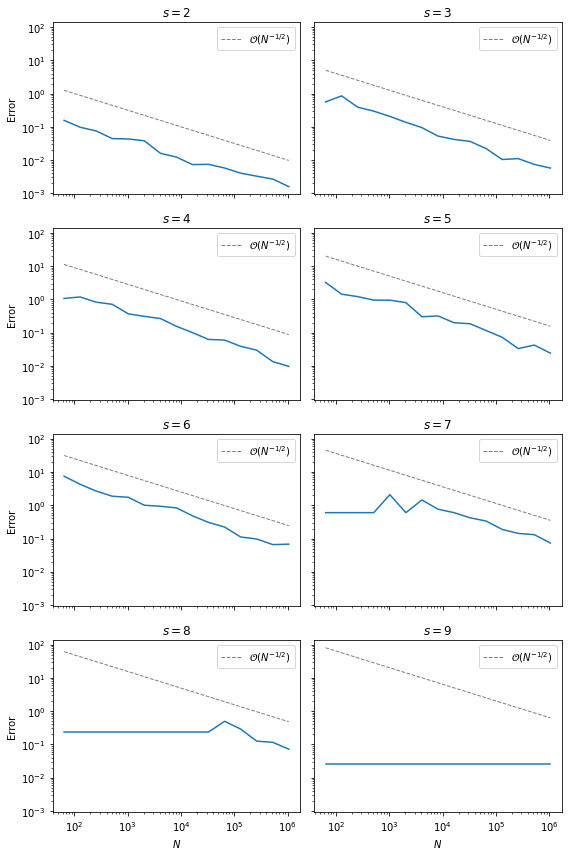

In [108]:
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(8, 12))
for i,ax in enumerate(axs.flat):
    ax.loglog(Ns, errors[i,:])
    
    y = lambda x : 10*(i+1)**2*1/np.sqrt(x)
    x0, x1 = Ns[0], Ns[-1]
    y0, y1 = y(x0), y(x1)
    ax.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1/2}})$")
    
    ax.set_title(f"$s = {dims[i]}$")
    ax.set(xlabel='$N$', ylabel='Error')
    ax.label_outer()
    ax.legend()
fig.tight_layout()
plt.savefig("mc_error.png", dpi=150)
plt.show()


In [159]:
mc_vals = np.loadtxt("output_c.txt")

dims = range(2,13)
means = np.mean(mc_vals, axis=1)
means = [np.power(mean*(2**dim)*gamma(dim/2+1), 2/dim) for (dim,mean) in zip(dims,means)]

stds  = np.std(mc_vals,axis=1)
cis   = 1.96 * stds/np.sqrt(mc_vals.shape[0])

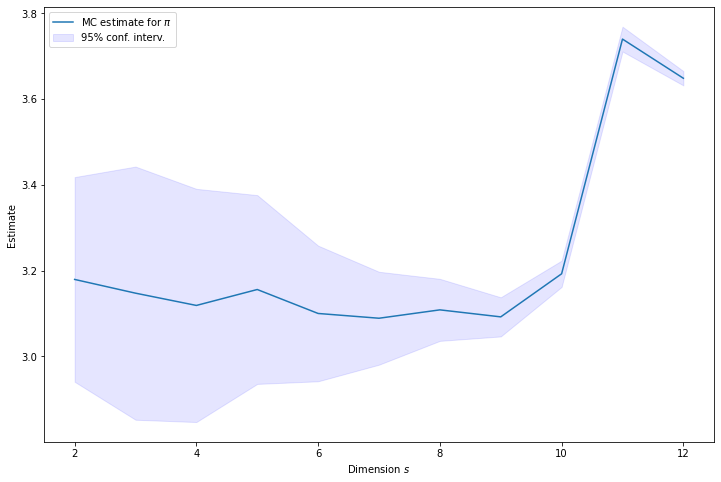

In [160]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel="Dimension $s$", ylabel="Estimate")
ax.plot(dims,means, label="MC estimate for $\pi$")
ax.fill_between(dims, (means-cis), (means+cis), color='b', alpha=.1, label="95% conf. interv.")
plt.legend()
plt.savefig("confinterval.png", dpi=150)
plt.show()

In [130]:
vals = np.empty((1000+1, 12, 10000), dtype = np.int8)

for i in range(1,1000+1):
    vals[i,:] = np.loadtxt(f"output/output_{i}.txt")

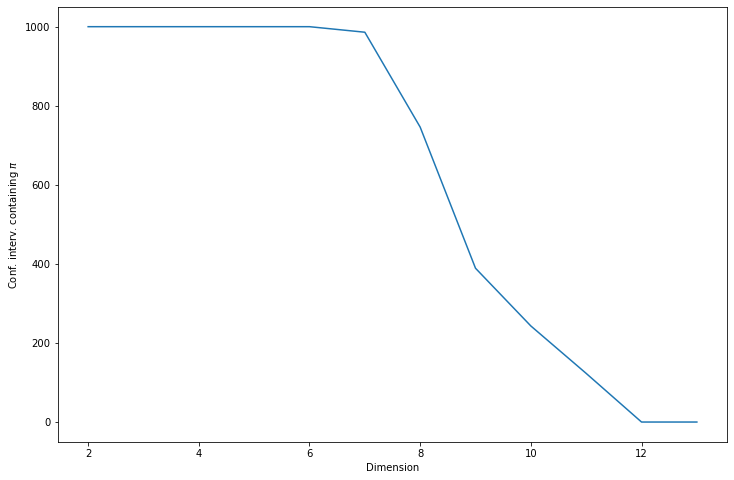

In [139]:
pi_ctr = np.zeros((12,1))

for i in range(1,1000+1):
    dims = range(2,14)
    means = np.mean(vals[i], axis=1)
    means = [np.power(mean*(2**dim)*gamma(dim/2+1), 2/dim) for (dim,mean) in zip(dims,means)]
    stds  = np.std(vals[i], axis=1)

    cis   = 1.96 * stds/np.sqrt(vals[i].shape[0])
    for j in range(12):
        if (np.pi >= means[j] - cis[j]) and (np.pi <= means[j] + cis[j]):
            pi_ctr[j] += 1
            
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dims, pi_ctr)
ax.set(xlabel = "Dimension")
ax.set(ylabel = "Conf. interv. containing $\pi$")
plt.savefig("confintervals_pi.png", dpi=150)
plt.show();

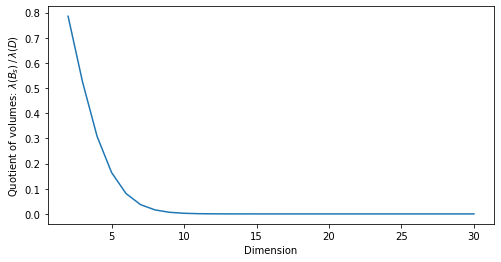

In [174]:
volumes = np.loadtxt("vol_diff.txt")
volumes = np.flip(volumes)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(range(2,31), volumes)
ax.set(xlabel="Dimension")
ax.set(ylabel="Quotient of volumes: $\lambda(B_s)\, /\, \lambda(D)$")
plt.savefig("volumes.png", dpi=150)
plt.show();

In [191]:
estimates = np.loadtxt("output3.txt")
ns = [2<<i for i in range(5,15+1)]
estimates

array([[ 4.34408,  2.76899,  2.40886,  3.13298,  3.10611,  2.61731,
         5.89053,  5.71112,  4.1358 ,  6.23761,  6.13411],
       [ 1.94931,  8.2515 ,  2.38524,  5.50542,  2.8778 ,  3.08821,
         6.27809,  5.08392,  7.28036,  3.74665,  9.04881],
       [ 1.25895,  2.71862,  6.03242,  2.60192,  3.33062,  5.44886,
         4.0948 ,  4.4021 ,  6.13061, 10.0363 ,  8.38917],
       [ 2.85505,  3.33958,  2.40029,  2.98357,  7.35759,  6.66983,
         8.43828,  4.44113,  8.02307,  7.36927,  5.19631],
       [ 1.62911,  3.29847,  2.22873, 92.1929 ,  3.2104 ,  5.77833,
         4.71048,  4.4594 ,  4.50523, 10.1561 , 31.0695 ],
       [ 7.59744,  1.7338 , 17.2132 ,  5.90331,  3.65042,  5.15918,
         9.60844,  3.51647,  4.88447,  4.13693,  6.13483],
       [ 4.49311,  3.25391,  2.60753,  2.92226,  3.42532,  4.50713,
         5.43856,  3.18452, 17.7723 ,  6.37055, 12.6645 ],
       [ 2.17538,  1.6209 ,  5.57091,  7.87137, 97.969  ,  3.19834,
        11.1127 ,  3.53588,  4.79727,  4.20

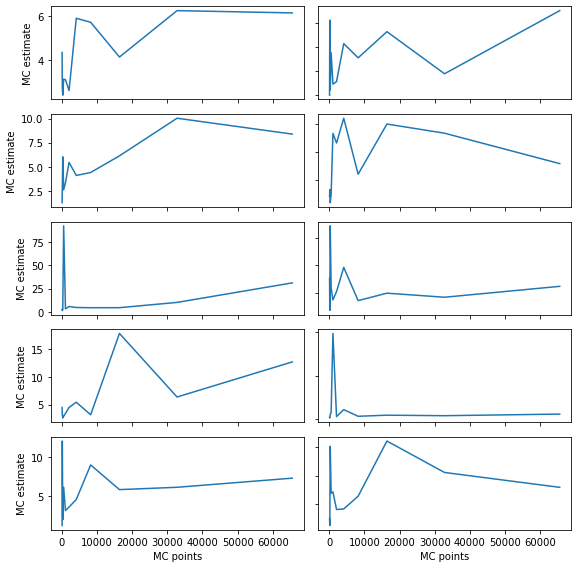

In [199]:
fig,axs = plt.subplots(5,2, sharex=True, figsize=(8, 8))

for i,ax in enumerate(axs.flat):
    ax.plot(ns, estimates[i,:])
    ax.set(xlabel="MC points", ylabel="MC estimate")
    ax.label_outer()
fig.tight_layout()
plt.savefig("mc_failure.png", dpi=150)
plt.show();